In [23]:
# Install required libraries
!pip install pandas numpy scikit-learn seaborn matplotlib

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [24]:
# Read the dataset
df = pd.read_csv('Fuel_cell_performance_data-Full.csv')

# Display information about the dataset
print("Available columns in the dataset:")
print(df.columns)
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Available columns in the dataset:
Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Target1', 'Target2', 'Target3', 'Target4',
       'Target5'],
      dtype='object')

First few rows of the dataset:
     F1    F2    F3     F4      F5    F6     F7     F8   F9   F10      F11  \
0  52.9  1.33  49.1  37.13  129.43  35.0  0.281  112.7  207  0.55   98.971   
1  87.6  2.12  48.8  42.10  171.07  37.6  0.153  157.4  188  0.86  101.179   
2  73.3  2.72  93.8  20.11  163.69  44.3  0.367  348.7  270  1.87   98.919   
3  65.6  2.58  48.1  35.11   63.37  32.5  0.279  321.2  322  1.75  101.560   
4  39.6  2.58  49.3  32.93   63.40  47.0  0.149  205.6  203  1.55   98.148   

    F12   F13   F14   F15  Target1  Target2  Target3  Target4  Target5  
0  2.87  1362  15.9   429    0.959    1.531     79.3     4.19    33.29  
1  2.34  5130  26.1  1819    0.728    1.690     57.2     5.19    34.50  
2  2.13  7811  16.7  1763    0.784    1.865     61.

In [26]:
# Prepare features and targets
feature_cols = [col for col in df.columns if col.startswith('F')]
X = df[feature_cols]

# Create target based on highest value among Target1 through Target5
target_cols = ['Target1', 'Target2', 'Target3', 'Target4', 'Target5']
y = df[target_cols].idxmax(axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
def train_evaluate_model(model, name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return {'accuracy': accuracy, 'classification_report': class_report}

# Create and evaluate models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    results[name] = train_evaluate_model(model, name, X_train_scaled, X_test_scaled, y_train, y_test)


Training Random Forest...

Training Logistic Regression...

Training SVM...



--------------------------------------------------
Random Forest Results:
Accuracy: 0.8600

Classification Report:
              precision    recall  f1-score   support

     Target3       0.86      0.95      0.90       209
     Target5       0.85      0.66      0.74        91

    accuracy                           0.86       300
   macro avg       0.85      0.80      0.82       300
weighted avg       0.86      0.86      0.85       300


--------------------------------------------------
Logistic Regression Results:
Accuracy: 0.8533

Classification Report:
              precision    recall  f1-score   support

     Target3       0.89      0.90      0.90       209
     Target5       0.76      0.75      0.76        91

    accuracy                           0.85       300
   macro avg       0.83      0.82      0.83       300
weighted avg       0.85      0.85      0.85       300


--------------------------------------------------
SVM Results:
Accuracy: 0.8733

Classification Report:
  

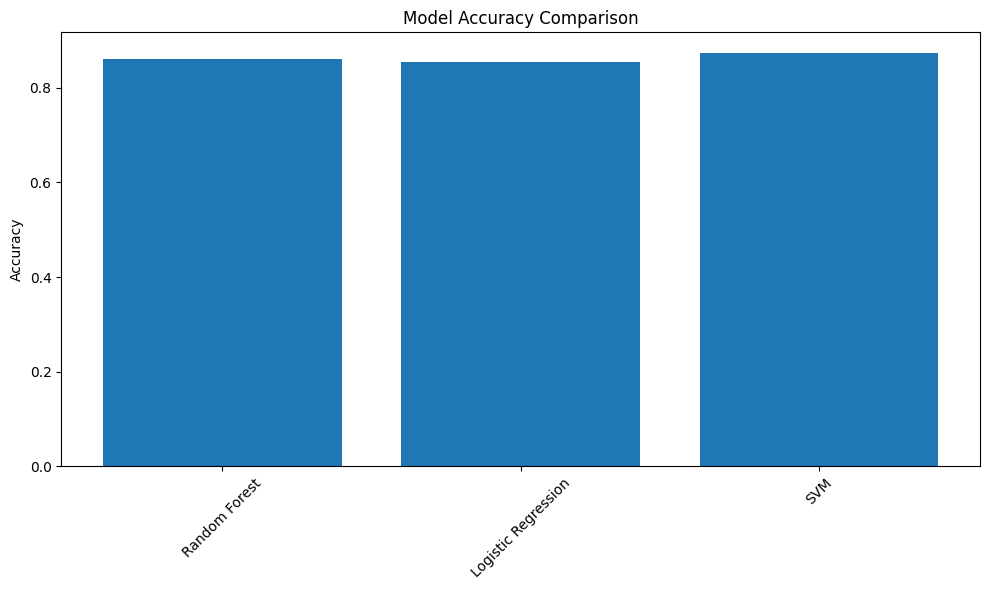

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Display results
for name, result in results.items():
    print(f"\n{'-'*50}")
    print(f"{name} Results:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("\nClassification Report:")
    print(result['classification_report'])

# Create accuracy comparison plot
plt.figure(figsize=(10, 6))
accuracies = [result['accuracy'] for result in results.values()]
model_names = list(results.keys())

plt.bar(model_names, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save results to markdown file
with open('model_results.md', 'w') as f:
    f.write("# Fuel Cell Performance Prediction Results\n\n")

    # Add dataset information
    f.write("## Dataset Information\n")
    f.write(f"* Number of features: {len(feature_cols)}\n")
    f.write(f"* Number of samples: {len(df)}\n")
    f.write(f"* Training set size: {len(X_train)}\n")
    f.write(f"* Test set size: {len(X_test)}\n\n")

    # Add model results
    for model_name, result in results.items():
        f.write(f"## {model_name}\n\n")
        f.write(f"### Accuracy: {result['accuracy']:.4f}\n\n")
        f.write("### Classification Report:\n")
        f.write("```\n")
        f.write(result['classification_report'])
        f.write("\n```\n\n")

# Download the results file
from google.colab import files
files.download('model_results.md')

In [29]:
# Create README.md
with open('README.md', 'w') as f:
    f.write("""# Fuel Cell Performance Prediction

## Project Overview
This project analyzes fuel cell performance data using multiple machine learning models.

## Models Used
- Random Forest Classifier
- Logistic Regression
- Support Vector Machine (SVM)

## Files
- `model_results.md`: Detailed results of model performance
- Python notebook: Contains all the code for data preprocessing and model training

## Results
See `model_results.md` for detailed performance metrics of each model.
""")

# Download README
files.download('README.md')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Detailed Classification Report:
              precision    recall  f1-score   support

     Target3       0.86      0.95      0.90       209
     Target5       0.85      0.66      0.74        91

    accuracy                           0.86       300
   macro avg       0.85      0.80      0.82       300
weighted avg       0.86      0.86      0.85       300



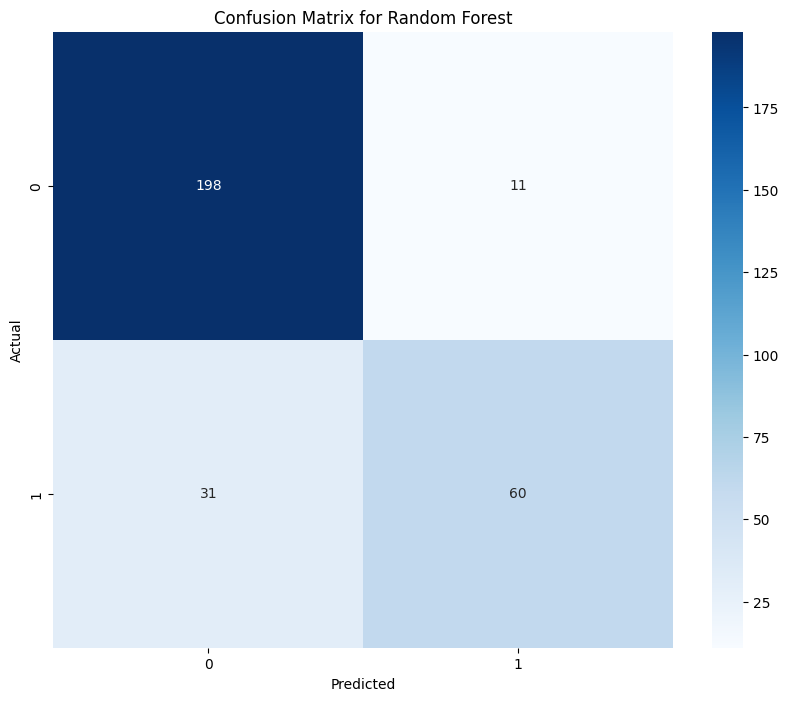


Accuracy Score: 0.8600


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get predictions from Random Forest model
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate detailed metrics
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print Accuracy Score
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred_rf):.4f}")